# Solution 8- queen use generation algorithm

# Libary and process

In [1]:
import random
import numpy as np
from deap import algorithms, base, creator, tools

In [2]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0, ))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [3]:
def create_individual():
    return random.sample(range(64), 8)

In [4]:
print(create_individual())

[24, 48, 58, 53, 12, 1, 26, 43]


In [5]:
def show_grid(board):
    n = [0] * 64
    for i in board:
        n[i] = 1
    
    for i in range(8):
        for j in range(64):
            if j // 8 == i:
                if n[j] == 1:   print('x', end = '|')
                else: print('-', end='|')
        print()

In [6]:
show_grid(create_individual())

-|x|-|-|-|-|-|-|
-|-|-|-|-|-|-|-|
-|-|-|-|-|-|-|x|
-|-|-|-|x|-|-|-|
x|-|x|-|-|x|-|-|
-|-|-|-|-|-|-|-|
-|-|-|-|-|x|-|-|
-|-|-|-|-|-|-|x|


In [7]:
toolbox = base.Toolbox()
toolbox.register('individual', tools.initIterate, creator.Individual, create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [8]:
pop = toolbox.population(n=5)
print(pop[0])

[21, 13, 1, 38, 11, 32, 22, 8]


In [9]:
show_grid(pop[0])

-|x|-|-|-|-|-|-|
x|-|-|x|-|x|-|-|
-|-|-|-|-|x|x|-|
-|-|-|-|-|-|-|-|
x|-|-|-|-|-|x|-|
-|-|-|-|-|-|-|-|
-|-|-|-|-|-|-|-|
-|-|-|-|-|-|-|-|


# Count meet by two queen

In [10]:
# function
def evaFitness(individual):
    conflict = 0
    for i in range(len(individual)):
        row1 = individual[i] // len(individual)
        column1 = individual[i] % len(individual)
        
        for j in range(i + 1, len(individual)):
            row2 = individual[j] // len(individual)
            column2 = individual[j] % len(individual)
            
            dx = abs(row1 - row2)
            dy = abs(column1 - column2)
            
            if column1 == column2 or row1 == row2:
                conflict += 1
            
            elif dx == dy:
                conflict += 1
    return (checkDuplicate(individual) + conflict, )
def checkDuplicate(individual):
    dup = 0
    
    dup = len(individual) - len(set(individual))
    
    return dup * 50

# Add function to toolbox

In [11]:
toolbox.register("evaluate", evaFitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=63, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

In [12]:
stats = tools.Statistics(key=lambda ind : ind.fitness.values)

In [13]:
stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("max", np.max)

# Individual

In [14]:
pop = toolbox.population(n=5000)
hof = tools.HallOfFame(maxsize=1)
pop, log = algorithms.eaSimple(pop, toolbox=toolbox, cxpb=0.5, mutpb=0.2, ngen=100, stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg    	min	max
0  	5000  	10.1042	3  	20 
1  	2974  	14.0906	2  	116
2  	3046  	13.537 	2  	163
3  	3017  	12.6974	2  	159
4  	2992  	12.616 	2  	115
5  	2931  	11.9338	2  	115
6  	3013  	11.88  	2  	112
7  	2994  	12.1994	2  	111
8  	3000  	11.9932	0  	158
9  	3028  	11.4038	0  	156
10 	3014  	11.2988	0  	156
11 	3041  	10.707 	0  	156
12 	3000  	10.8044	0  	111
13 	2976  	10.4766	0  	155
14 	3002  	10.191 	0  	156
15 	3017  	9.685  	0  	111
16 	2948  	8.7272 	0  	111
17 	3017  	7.4858 	0  	108
18 	3045  	5.3676 	0  	155
19 	2969  	2.9976 	0  	103
20 	3008  	2.0118 	0  	106
21 	2945  	1.4016 	0  	103
22 	3095  	1.4158 	0  	104
23 	2964  	1.3684 	0  	106
24 	3019  	1.181  	0  	103
25 	2996  	1.307  	0  	102
26 	3024  	1.352  	0  	154
27 	2994  	1      	0  	59 
28 	3044  	1.1544 	0  	105
29 	2990  	1.1104 	0  	103
30 	2943  	1.0978 	0  	105
31 	2974  	1.2058 	0  	106
32 	3000  	1.3262 	0  	102
33 	3024  	1.1322 	0  	102
34 	2980  	1.2046 	0  	103
35 	3057  	1.3334 	0  	105
3

plot the avg and min for each generation

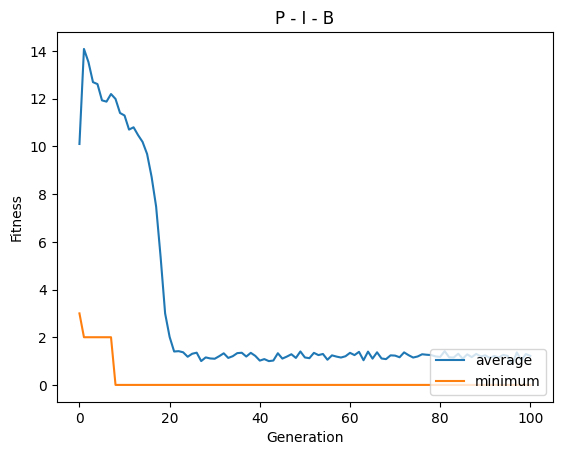

In [15]:
import matplotlib.pyplot as plt

gen, avg, min_ = log.select("gen", "avg", "min")
plt.title("P - I - B")
plt.plot(gen, avg, label= "average")
plt.plot(gen, min_, label="minimum")

plt.xlabel("Generation")
plt.ylabel("Fitness")

plt.legend(loc="lower right")
plt.show()

# Best individual

In [16]:
print("best individual generation: ", hof[0])

print("With fitness: ", hof[0].fitness)

show_grid(hof[0])

best individual generation:  [1, 58, 12, 53, 22, 47, 32, 27]
With fitness:  (0.0,)
-|x|-|-|-|-|-|-|
-|-|-|-|x|-|-|-|
-|-|-|-|-|-|x|-|
-|-|-|x|-|-|-|-|
x|-|-|-|-|-|-|-|
-|-|-|-|-|-|-|x|
-|-|-|-|-|x|-|-|
-|-|x|-|-|-|-|-|


In [17]:
record = stats.compile(pop)
record


{'avg': 1.2178, 'min': 0.0, 'max': 102.0}